In [120]:
# import some stuff
!pip install keras
!pip install tensorflow
!pip install scypi
!pip install matplotlib

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from PIL import Image
from matplotlib import pyplot
from skimage import feature
import cv2

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement scypi (from versions: none)
ERROR: No matching distribution found for scypi


Defaulting to user installation because normal site-packages is not writeable


In [128]:
# import and download data
from keras.datasets import fashion_mnist
import numpy as np
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

# reformat labels
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# define number of classes 
classNum = 10

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


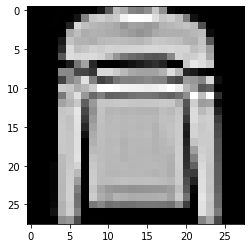

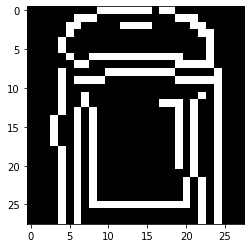

In [146]:
#Edge detection
import matplotlib.pyplot as plt
test_image = trainX[5]
plt.imshow(test_image, cmap=pyplot.get_cmap('gray'))
plt.show()
edges1 = cv2.Canny(test_image, threshold1 = 300, threshold2=400)
#edges2 = feature.canny(test_image, sigma=1)

plt.imshow(edges1, cmap=pyplot.get_cmap('gray'))
plt.show()

#plt.imshow(edges2, cmap=pyplot.get_cmap('gray'))
#plt.show()
#trainX = np.expand_dims(trainX.astype('float16') / 255., axis=3)
#testX = np.expand_dims(testX.astype('float16') / 255., axis=3)

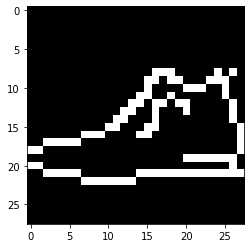

In [123]:
# Edge extraction
mod_trainX = np.zeros((60000,28,28), dtype=int)
mod_testX = np.zeros((10000,28,28), dtype=int)

for i in range(60000):
	#mod_trainX[i] = feature.canny(trainX[i])
	mod_trainX[i] = cv2.Canny(trainX[i], threshold1 = 300, threshold2=400)
for i in range(10000):
	#mod_testX[i] = feature.canny(testX[i])
	mod_testX[i] = cv2.Canny(testX[i], threshold1 = 300, threshold2=400)

plt.imshow(mod_testX[0], cmap=pyplot.get_cmap('gray'))
plt.show()

In [124]:
mod_trainX = np.expand_dims(mod_trainX.astype('float16') / 255., axis=3)
mod_testX = np.expand_dims(mod_testX.astype('float16') / 255., axis=3)
trainX = np.expand_dims(trainX.astype('float16') / 255., axis=3)
testX = np.expand_dims(testX.astype('float16') / 255., axis=3)

print(mod_trainX.shape)
print(trainX.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [125]:
# make model
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding="same", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(classNum,activation='softmax'))

#opt = keras.optimizers.SGD(learning_rate = 0.1, momentum= 0.1)
opt = tf.keras.optimizers.Adadelta(learning_rate = 0.08, rho = 0.7)

model.compile(loss=binary_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

In [126]:
# define some hyper parameters and train
model.fit(mod_trainX, trainY, batch_size=4)
score = model.evaluate(mod_testX, testY, verbose=0)
results = "Test accuracy: {}\n".format(score[1])
print(results)
with open("./model_results.txt", "a") as fh:
    fh.write("################################################################\n")
    fh.write(results)
    fh.write("----------------------------------------------------------------\n")
    model.summary(print_fn=lambda x: fh.write(x + '\n'))
    fh.close()

15000/15000 [==============================] - 83s 6ms/step - loss: 0.0935 - accuracy: 0.8276
Test accuracy: 0.8349999785423279

